# Байесовский выбор моделей
## Домашняя работа №1
### Никитина Мария, Б05-003

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.multitest import multipletests

# Задача 1

Пусть проводится эксперимент по угадыванию стороны выпадания
честной монеты. Известно, что оракул прав с вероятностью $p_1 = 0.9$, а обычный человек с вероятностью $p_2 = 0.5$. Известно, что человек $P$ оказался прав во всех $n = 10$ бросаниях. С какой вероятностью $P$ является оракулом, если случайные человек оказывается оракулом с вероятностью $10^{-4}$ (3 балла)? Пусть человек $P$ выбран не случайно, а как лучший среди 100 человек по угадыванию $k = 100$ выпадений монеты. Вывести новую априорную вероятность того, что $P$ оракул с учётом его неслучайного выбора (7 баллов).

## Решение

Пусть:

$A = [P -$ оракул$]$

$B = [P$ прав во всех $n = 10$ бросаниях$]$

Формула Байеса: $P(A|B) = \frac{P(B|A) P(A)}{P(B)}$

Формула полной вероятности: $P(B) = P(B|A)P(A) + P(B|\overline A)P(\overline A)$

$P(B|A) = p_1^n, ~ P(B|\overline A) = p_2^n, ~ P(A) = 10^{-4}, ~ P(\overline A) = 1 - P(A) = 1 - 10^{-4}$

$P(A|B) = \frac{P(A)P(B|A)}{P(B|A)P(A) + P(B|\overline A)P(\overline A)} = \frac{10^{-4} \cdot 0.9^{10}}{0.9^{10} \cdot 10^{-4} + 0.5^{10} \cdot (1 - 10^{-4})} \approx 0.0345$

Вероятность, с которой $P$ является оракулом: $P(A|B) \approx 0.0345$

Пусть человек $P$ выбран не случайно, а как лучший среди 100 человек по угадыванию $k = 100$ выпадений монеты. Тогда будем считать, что $P(A) = k \cdot 10^{-4} = 100 \cdot 10^{-4} = 0.01$ -- вероятность найти оракула среди 100 человек, но с учётом того, что мы берём лучшего из этих 100 человек, это ещё и априорная вероятность, что $P$ -- оракул.

In [ ]:
p_1 = 0.9                   # вероятность оракулу угадать результат
p_2 = 0.5                   # вероятность человеку угадать результат
p_a  = 10 ** (-4)           # вероятность случайно найти оракула
participants = 100          # число людей, среди которых выбираем оракула
num_experiments = 100000    # число экспериментов для усреднения

def sampl(num_experiments, participants, k, p_a):
    oracles = 0

    for i in range(num_experiments):

        # Устанавливаем метку для каждого человека: оракул или нет
        labels = np.random.binomial(1, p_a, participants)
        # (оракул или нет, число угаданных подбрасываний)
        best = (labels[0], 0)

        for label in labels:
            if label == 1:
                guess = np.random.binomial(k, 0.9)
            else:
                guess = np.random.binomial(k, 0.5)
            if guess > best[1]:
                best = (label, guess)

        if best[0] == 1:
            oracles += 1

    return 1.0 * oracles / num_experiments

res = [sampl(num_experiments, participants, k, p_a) for k in np.linspace(1, 1001, 100)]

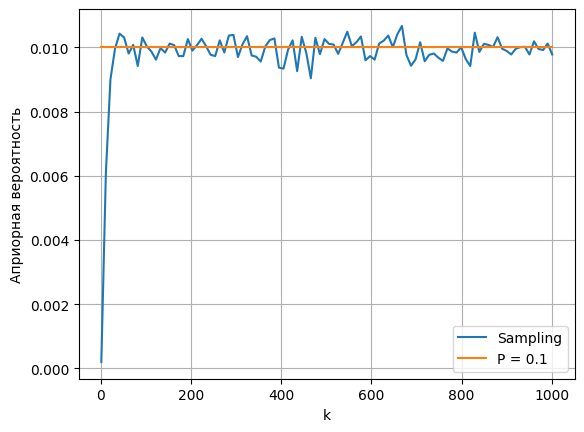

In [ ]:
plt.plot(np.linspace(1, 1001, 100), res, label="Sampling")
plt.plot(np.linspace(1, 1001, 100), [0.01 for i in np.linspace(1, 1001, 100)],
         label=r"P = 0.1")
plt.xlabel(r"k")
plt.ylabel("Априорная вероятность")
plt.legend()
plt.grid()

# Задача 2

Пусть имеется НОР выборка $\{x_1, . . . , x_n\}$ из неизвестного распределения с конечной плотностью. На уровне значимости $\alpha = 0.05$ проверить гипотезу о
том, что десятипроцентная квантиль этого распределения равна $m_0 = 0$.

Гипотеза $H_0:$ десятипроцентная квантиль распределения равна $m_0 = 0$.

Выберем статистику: $T(Z) = \frac{1}{n}\sum\limits_{i = 1}^nI(X_i \leq 0)$.

Тогда, если гипотеза верна, то $I(X_i \leq 0) \sim Be(0.1)$.

Тогда обозначим $\xi = \sum\limits_{i = 1}^nI(X_i \leq 0) \sim Binom(n, 0.1)$ и получим $T(Z) = \frac{1}{n}\xi$.

Матожидание $E(T(Z)) = \frac{1}{n} \cdot n \cdot 0.1 = 0.1$

Дисперсия $D(T(Z)) = \frac{1}{n^2} \cdot n \cdot 0.1 \cdot 0.9 = \frac{0.09}{n} \to 0$ при $n \to \infty$.

Выберем границы справа и слева, чтобы отделялось по $2.5\%$: $m_{2.5}$ и $m_{97.5} - 2.5\%$-квантиль и $97.5\%$-квантиль биномиального распределения соответственно.

Гипотеза отвергается в случае, если $T(Z) \notin (\frac{m_{2.5}}{n}, \frac{m_{97.5}}{n})$, т.е. $P(T(Z) < \frac{m_{2.5}}{n}) + P(T(Z) > \frac{m_{97.5}}{n}) \leq 0.05$.



# Задача 3

Пусть имеется выборка пар $\mathbf{z}_{i} = x_{i}, y_{i}, ~ i=\overline{1, n},$
$$\mathbf{z}_{i} \sim N \left(\mathbf{z}_{i} | (0,0)^{\top}, \left(\begin{array}{ll}
1 & \rho \\
\rho & 1
\end{array}\right)\right)$$

Гипотеза $H_0 : \rho = 0$

Для статистики $T(Z) = \frac{1}{n}\sum x_i y_i $ получить

а) распределение для разных значений $\rho$ и нарисовать плотность для $\rho = 0$ и $\rho = 0.5$ для $n = 100$ (2 балла);

б) построить критерий для проверки гипотезы $\rho = 0$ на уровне значимости $\alpha = 0.05$ (3 балла)

в) зависимость мощности данного критерия от истинного $\rho$ сэмплированием (5 баллов) и приближенно аналитически (5 баллов), и предложить форму (3 балла) зависимости мощности критерия от $n$ и $\rho$.

Сравнить мощность (7 баллов) в зависимости от $\rho$ со статистикой $T(Z) = \frac{1}{2n}\sum\limits_{i = 1}^n (x_i - y_i)^2$, рассмотренной на лекции.

Какую статистику вы предложили бы для использования на практике?

Предположим, что $n$ достаточно велико, чтобы использовать ЦПТ. Тогда:

$$\frac{\frac{1}{n}\sum\limits_{i = 1}^{n} x_i y_i - E(x_i y_i)}{\sqrt{D(x_i y_i)}}\sqrt{n} =\frac{\frac{1}{n}\sum\limits_{i = 1}^{n} x_i y_i - \rho}{\sqrt{1 + \rho^2}}\sqrt{n} \sim N(0,1),$$

где $E(x_i y_i) = \mu_x\mu_y + \rho\sigma_x\sigma_y = \rho$, $D(x_i, y_i) = \mu_x^2\sigma_y^2 + \mu_y^2\sigma_y^2 + \sigma_x^2\sigma_y^2 + 2\rho\mu_x\mu_y\sigma_x\sigma_y + \rho^2\sigma_x^2\sigma_y^2 = 1 + \rho^2$.

Следовательно, $T(Z) = \frac{1}{n}\sum\limits_{i = 1}^{n} x_i y_i \sim N\left(\rho, \frac{1 + \rho^2}{n}\right)$

а) $\rho = 0 \Rightarrow T(Z) \sim N \left(0, \frac{1}{n} \right)$

$\rho = 0 \Rightarrow T(Z) \sim N \left(0.5, \frac{1.25}{n} \right)$

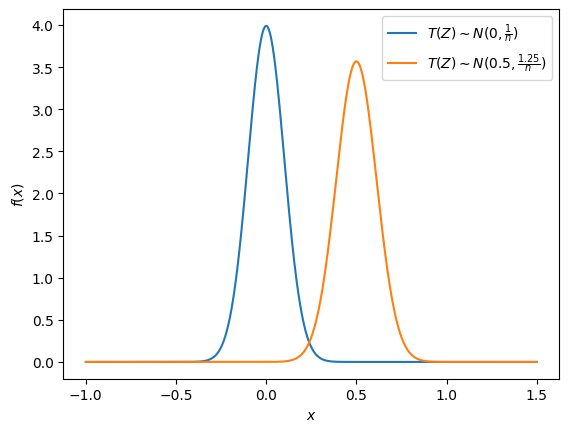

In [ ]:
n = 100 # достаточно, чтобы можно было использовать ЦПТ

rho_1 = 0
rho_2 = 0.5

sigma_1 = np.sqrt(1 / n)
sigma_2 = np.sqrt(1.25 / n)

plt.plot(
    np.linspace(-1, 1.5, 1000),
    stats.norm.pdf(np.linspace(-1, 1.5, 1000), rho_1, sigma_1),
    label = r'$T(Z) \sim N(0, \frac{1}{n})$'
)
plt.plot(
    np.linspace(-1, 1.5, 1000),
    stats.norm.pdf(np.linspace(-1, 1.5, 1000), rho_2, sigma_2),
    label = r'$T(Z) \sim N(0.5, \frac{1.25}{n})$'
)

plt.xlabel(r"$x$")
plt.ylabel(r"$f(x)$")
plt.legend()

б) $\sigma = \frac{1}{\sqrt{n}}$, тогда $\sim 95\%$ площади под графиком приходится на область от $-\frac{2}{\sqrt{n}}$ до $\frac{2}{\sqrt{n}}$.

Гипотеза $H_0$ отвергается, если $T(Z) \notin \left[-\frac{2}{\sqrt{n}}, \frac{2}{\sqrt{n}}\right]$.

в) Найдём зависимость мощности данного критерия от истинного $\rho$ сэмплированием и приближенно аналитически.

$$W = \int\limits_{-\infty}^{-2/\sqrt{n}}f_{T(z)}(t)dt + \int\limits^{+\infty}_{2/\sqrt{n}}f_{T(z)}(t)dt = F_{T(z)}\left(-\frac{2}{\sqrt{n}}\right)+1-F_{T(z)}\left(\frac{2}{\sqrt{n}}\right)$$

Зависимость от $n$ и $\rho$ получим, исходя из того, что $T(Z) \sim N\left(\rho, \frac{1 + \rho^2}{n}\right)$:

$$W(n, \rho) = 1 - \Phi\left(\frac{2 - \rho\sqrt{n}}{\sqrt{1 + \rho^2}}\right) + \Phi\left(\frac{-2 - \rho\sqrt{n}}{\sqrt{1 + \rho^2}}\right)$$

In [ ]:
def sampl(num_experiments, n, rho):
    sigma = np.sqrt(1 / n)
    crit = 2 * sigma # граница критической области
    rejects = 0

    for i in range(num_experiments):
        z = np.random.multivariate_normal([0, 0], [[1, rho], [rho, 1]], n)
        T = 1 / n * np.sum([x * y for x, y in z])

        if not(-crit <= T <= crit):
            rejects += 1

    return 1.0 * rejects / num_experiments

rho_linspace = np.linspace(-2, 2, 100)

res_50 = [sampl(10000, 50, rho) for rho in rho_linspace]
res_100 = [sampl(10000, 100, rho) for rho in rho_linspace]
res_500 = [sampl(10000, 500, rho) for rho in rho_linspace]

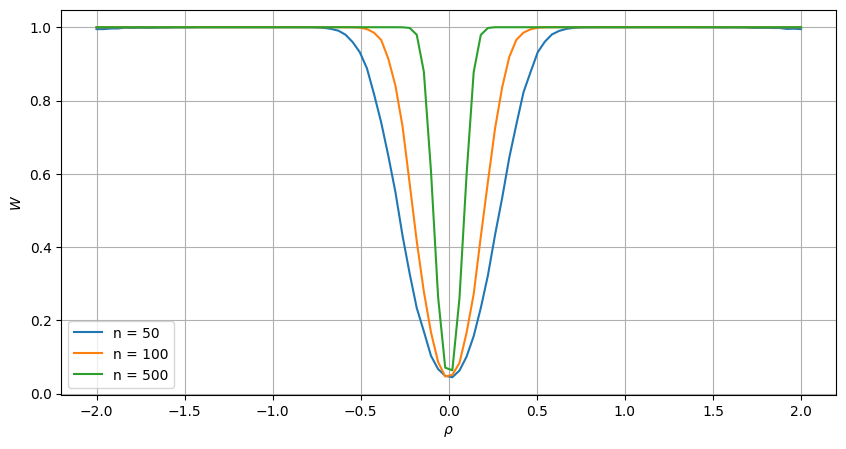

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(rho_linspace, res_50, label=r"n = 50")
plt.plot(rho_linspace, res_100, label=r"n = 100")
plt.plot(rho_linspace, res_500, label=r"n = 500")
plt.xlabel(r"$\rho$")
plt.ylabel(r"$W$")
plt.legend()
plt.grid()

In [ ]:
def analytical(n, rho):
    a = (2 - rho * np.sqrt(n)) / np.sqrt(1 + rho**2)
    b = (-2 - rho * np.sqrt(n)) / np.sqrt(1 + rho**2)
    return 1 - stats.norm.cdf(a) + stats.norm.cdf(b)

res_analytical_50 = [analytical(50, rho) for rho in rho_linspace]
res_analytical_100 = [analytical(100, rho) for rho in rho_linspace]
res_analytical_500 = [analytical(500, rho) for rho in rho_linspace]

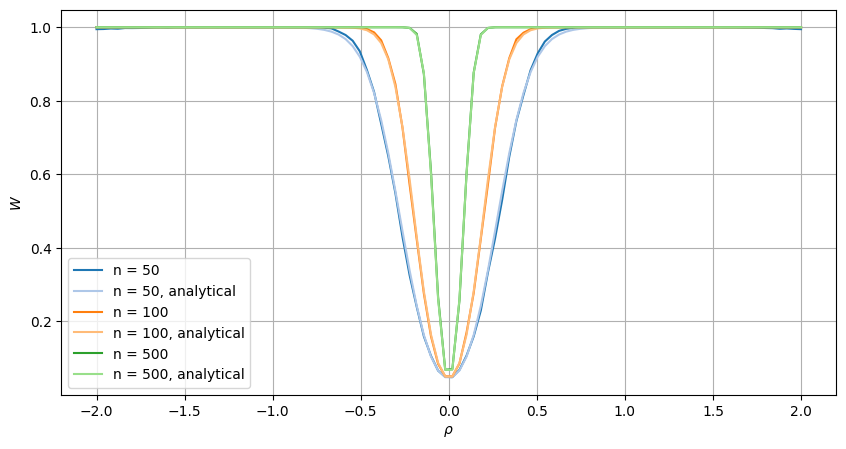

In [ ]:
colors = [plt.cm.tab20(i) for i in range(6)]
plt.figure(figsize=(10, 5))
plt.plot(rho_linspace, res_50, color=colors[0], label=r"n = 50")
plt.plot(rho_linspace, res_analytical_50, color=colors[1], label=r"n = 50, analytical")
plt.plot(rho_linspace, res_100, color=colors[2], label=r"n = 100")
plt.plot(rho_linspace, res_analytical_100, color=colors[3], label=r"n = 100, analytical")
plt.plot(rho_linspace, res_500, color=colors[4], label=r"n = 500")
plt.plot(rho_linspace, res_analytical_500, color=colors[5], label=r"n = 500, analytical")
plt.xlabel(r"$\rho$")
plt.ylabel(r"$W$")
plt.legend()
plt.grid()

Введём статистику, рассмотренную на лекции:

$$T(Z) = \frac{1}{2n}\sum\limits_{i=1}^n(x_i - y_i)^2 = \frac{1 - \rho}{n}\xi, ~ \xi \sim \chi^2(n)$$

$$\frac{x_i - y_i}{\sqrt{2(1 - \rho)}} \sim N(0, 1) \Rightarrow \frac{(x_i - y_i)^2}{2(1 - \rho)} \sim \chi^2(1)$$

Выберем границы справа и слева, чтобы отделялось по $2.5\%$: $m_{2.5}$ и $m_{97.5} - 2.5\%$-квантиль и $97.5\%$-квантиль распределения $\chi^2(n)$.

Гипотеза отвергается в случае, если $T(Z) \notin (\frac{m_{2.5}}{n}, \frac{m_{97.5}}{n})$.

Мощность критерия:

$$W = F_{T(z)}\left(-\frac{m_{2.5}}{\sqrt{n}}\right)+1-F_{T(z)}\left(\frac{2}{\sqrt{n}}\right)$$

$$W(\rho) = 1 + F_{\xi}\left(\frac{m_{2.5}}{1 - \rho}\right) - F_{\xi}\left(\frac{m_{97.5}}{1 - \rho}\right)$$

In [ ]:
def lecture(n, rho):
    rv = stats.chi2(n)
    a = rv.ppf(0.025) / (1 - rho)
    b = rv.ppf(0.975) / (1 - rho)
    return 1 + rv.cdf(a) - rv.cdf(b)

res_lecture_50 = [lecture(50, rho) for rho in rho_linspace]

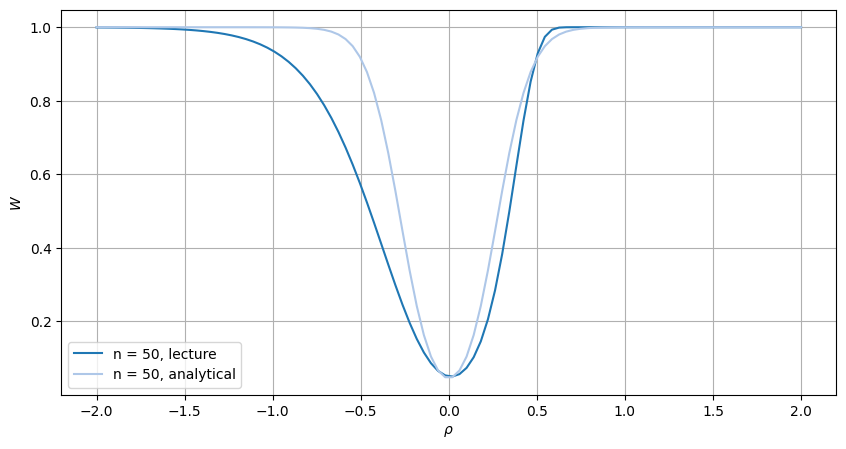

In [ ]:
colors = [plt.cm.tab20(i) for i in range(6)]
plt.figure(figsize=(10, 5))
plt.plot(rho_linspace, res_lecture_50, color=colors[0], label=r"n = 50, lecture")
plt.plot(rho_linspace, res_analytical_50, color=colors[1], label=r"n = 50, analytical")
plt.xlabel(r"$\rho$")
plt.ylabel(r"$W$")
plt.legend()
plt.grid()

Статистика с лекции лучше нашей тем, что при малых $n$ мы знаем её поведение, в то время, как наша статистика рассматривалась в приближении ЦПТ. Однако, мощность статистики с лекции не зависит от $n$, откуда можно сделать вывод о том, что при увеличеснии количества данных мы не сможем увеличить мощность. Что не очень хорошо. Мощность нашей статистики зависит от $n$, что даёт возможность улучшать её, увеличивая $n$.

# Задача 6

В условиях задачи 3 для $\rho = 0.2$ и $\rho = 0$ при $n = 100$ сэмплировать $m = 1000$ выборок пар $\mathbf{z}_{i} = x_{i}, y_{i}, i=\overline{1, n}$, для $500$ из которых $\rho = 0$ и $\rho = 0.2$ для оставшихся. С помощью одной из рассмотренных (или своей) статистик получить достигаемые уровни значимости $p_1,..., p_m$. Для уровня значимости $\alpha = 0.05$ сравнить результаты применения отсутствия поправки на множественное тестирование, поправки Бонферрони и поправки Бенджамини-Хохберга в терминах получения ложных открытий (ложно отклоненные гипотезы) или пропуска таковых (ложно принятые гипотезы). Контролирует ли поправка Бенджамини-Хохберга FDR на уровне $\alpha$ и почему? (8 баллов)

In [103]:
# Посчитаем статистики для каждого rho
m = 1000
n = 100

def sampl_6(m, n, rho):
    T = []
    z = np.random.multivariate_normal([0, 0], [[1, rho], [rho, 1]], (m, n))
    for i in range(m):
        T.append(1 / n * np.sum([x * y for x, y in z[i]]))
    return np.array(T)

T_0 = sampl_6(m // 2, n, 0)
T_2 = sampl_6(m // 2, n, 0.2)

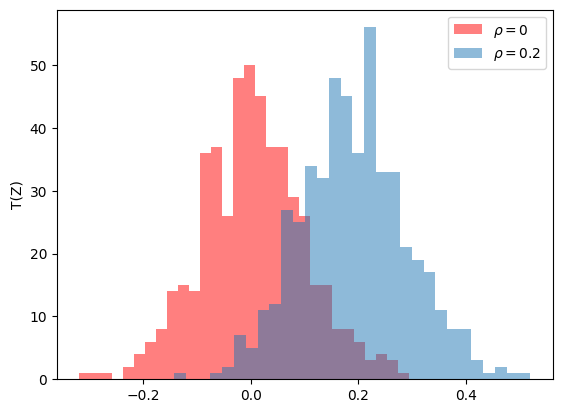

In [104]:
# Посмотрим на статистики
plt.hist(T_0, bins = 30, label = r'$\rho = 0$', color='r', alpha = 0.5)
plt.hist(T_2, bins = 30, label = r'$\rho = 0.2$', alpha = 0.5)
plt.ylabel(r"T(Z)")
plt.legend()
plt.show()

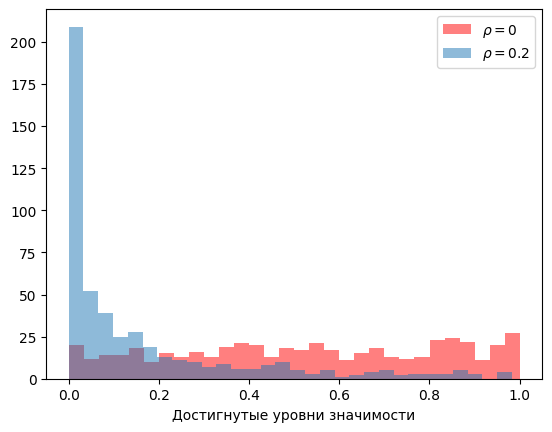

In [105]:
def reached_levels(m, n, T):
    our_norm = stats.norm(0, np.sqrt(1 / n))
    integral = our_norm.cdf(T)
    return 2 * np.min([integral, np.ones(m) - integral], axis = 0)

reached_0 = reached_levels(m // 2, n, T_0)
reached_2 = reached_levels(m // 2, n, T_2)
plt.hist(reached_0, bins=30, label = r'$\rho = 0$', color='r', alpha = 0.5)
plt.hist(reached_2, bins=30, label = r'$\rho = 0.2$', alpha = 0.5)
plt.xlabel("Достигнутые уровни значимости")
plt.legend()
plt.show()

In [106]:
reached = np.concatenate([reached_0, reached_2])
bonferroni_0 = np.sum(multipletests(reached, 0.05, method="bonferroni")[0][:500])
bonferroni_2 = m // 2 - np.sum(multipletests(reached, 0.05, method="bonferroni")[0][500:])
bh_0 = np.sum(multipletests(reached, 0.05, method="fdr_bh")[0][:500])
bh_2 = m // 2 - np.sum(multipletests(reached, 0.05, method="fdr_bh")[0][500:])
print(f"Число ложных открытий при отсутствии поправок: {np.sum(reached_0 < 0.05)}")
print(f"Число пропусков открытий при отсутствии поправок: {np.sum(reached_2 > 0.05)}")
print(f"Число ложных открытий c Бонферрони: {bonferroni_0}")
print(f"Число пропусков открытий c Бонферрони: {bonferroni_2}")
print(f"Число ложных открытий с Б-Х: {bh_0}")
print(f"Число пропусков открытий с Б-Х: {bh_2}")
print(f"FDR: {2 * bh_0 / m}")

Число ложных открытий при отсутствии поправок: 26
Число пропусков открытий при отсутствии поправок: 263
Число ложных открытий c Бонферрони: 0
Число пропусков открытий c Бонферрони: 492
Число ложных открытий с Б-Х: 2
Число пропусков открытий с Б-Х: 416
FDR: 0.004


Поправка Бенджамини-Хохберга контролирует FDR на уровне $\alpha$, что сходится с теорией при независимых статистиках.

Рассмотреть отдельно $1000$ выборок для $\rho = 0$ и повторить эксперимент. Сравнить результаты применения отсутствия поправки на множественное тестирование, поправки Бонферрони и поправки Бенджамини-Хохберга в терминах получения ложных открытий (ложно отклоненные гипотезы) или пропуска таковых (ложно принятые гипотезы). Контролирует ли поправка Бенджамини-Хохберга FDR на уровне $\alpha$ и почему? (7 баллов)

In [82]:
m = 1000
n = 100

T_0 = sampl_6(m, n, 0)
reached_0 = reached_levels(m, n, T_0)
bonferroni_0 = np.sum(multipletests(reached_0, 0.05, method="bonferroni")[0])
bh_0 = np.sum(multipletests(reached_0, 0.05, method="fdr_bh")[0])
print(f"Число ложных открытий при отсутствии поправок: {np.sum(reached_0 < 0.05)}")
print(f"Число пропусков открытий при отсутствии поправок: 0")
print(f"Число ложных открытий c Бонферрони: {bonferroni_0}")
print(f"Число пропусков открытий c Бонферрони: 0")
print(f"Число ложных открытий с Б-Х: {bh_0}")
print(f"Число пропусков открытий с Б-Х: 0")
print(f"FDR: {bh_0 / m}")

Число ложных открытий при отсутствии поправок: 55
Число пропусков открытий при отсутствии поправок: 0
Число ложных открытий c Бонферрони: 0
Число пропусков открытий c Бонферрони: 0
Число ложных открытий с Б-Х: 0
Число пропусков открытий с Б-Х: 0
FDR: 0.0


# Задача 7

В условиях задачи 6 сэмплировать $m = 1000$ выборок пар, но с $\rho_m$, зависящим от номера выборки. Провести те же исследования, что и в задаче 6.

In [144]:
m = 1000
n = 100

def sampl_7(m, n):
    T = []
    rhos = []
    for i in range(m):
        if i == 0:
            rhos.append(0)
        else:
            rhos.append(np.random.choice([rhos[i-1], 0.2 - rhos[i-1]], 1, [0.3, 0.7])[0])
        z = np.random.multivariate_normal([0, 0], [[1, rhos[i]], [rhos[i], 1]], n)
        T.append(1 / n * np.sum([x * y for x, y in z]))
    return np.array(rhos), np.array(T)

rhos, T = sampl_7(m, n)

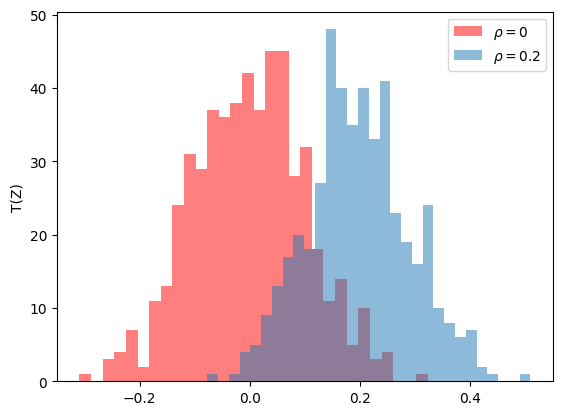

In [145]:
# Посмотрим на статистики
plt.hist(T[rhos == 0], bins = 30, label = r'$\rho = 0$', color='r', alpha = 0.5)
plt.hist(T[rhos == 0.2], bins = 30, label = r'$\rho = 0.2$', alpha = 0.5)
plt.ylabel(r"T(Z)")
plt.legend()
plt.show()

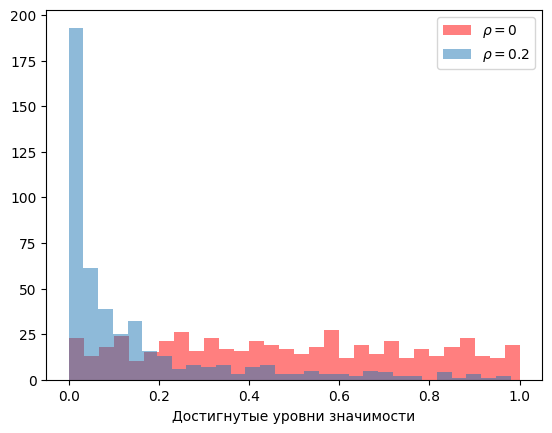

In [146]:
def reached_levels(m, n, T):
    our_norm = stats.norm(0, np.sqrt(1 / n))
    integral = our_norm.cdf(T)
    return 2 * np.min([integral, np.ones(m) - integral], axis = 0)

len_0 = T[rhos == 0].size
len_2 = T[rhos == 0.2].size
reached_0 = reached_levels(len_0, n, T[rhos == 0])
reached_2 = reached_levels(len_2, n, T[rhos == 0.2])
plt.hist(reached_0, bins=30, label = r'$\rho = 0$', color='r', alpha = 0.5)
plt.hist(reached_2, bins=30, label = r'$\rho = 0.2$', alpha = 0.5)
plt.xlabel("Достигнутые уровни значимости")
plt.legend()
plt.show()

In [147]:
reached = np.concatenate([reached_0, reached_2])
bonferroni_0 = np.sum(multipletests(reached, 0.05, method="bonferroni")[0][:len_0])
bonferroni_2 = m // 2 - np.sum(multipletests(reached, 0.05, method="bonferroni")[0][len_0:])
bh_0 = np.sum(multipletests(reached, 0.05, method="fdr_bh")[0][:len_0])
bh_2 = m // 2 - np.sum(multipletests(reached, 0.05, method="fdr_bh")[0][len_0:])
print(f"Число ложных открытий при отсутствии поправок: {np.sum(reached_0 < 0.05)}")
print(f"Число пропусков открытий при отсутствии поправок: {np.sum(reached_2 > 0.05)}")
print(f"Число ложных открытий c Бонферрони: {bonferroni_0}")
print(f"Число пропусков открытий c Бонферрони: {bonferroni_2}")
print(f"Число ложных открытий с Б-Х: {bh_0}")
print(f"Число пропусков открытий с Б-Х: {bh_2}")
print(f"FDR: {2 * bh_0 / m}")
print(f"Число выборок с rho = 0: {len_0}")
print(f"Число выборок с rho = 0.2: {len_2}")

Число ложных открытий при отсутствии поправок: 33
Число пропусков открытий при отсутствии поправок: 236
Число ложных открытий c Бонферрони: 0
Число пропусков открытий c Бонферрони: 493
Число ложных открытий с Б-Х: 2
Число пропусков открытий с Б-Х: 420
FDR: 0.004
Число выборок с rho = 0: 531
Число выборок с rho = 0.2: 469


Поправка Бенджамини-Хохберга контролирует FDR на уровне $\alpha$, что странно, ведь $\rho$ выбираются зависимо друг от друга. Возможно, такой способ задания $\rho$ не вносит большой корреляции данных.